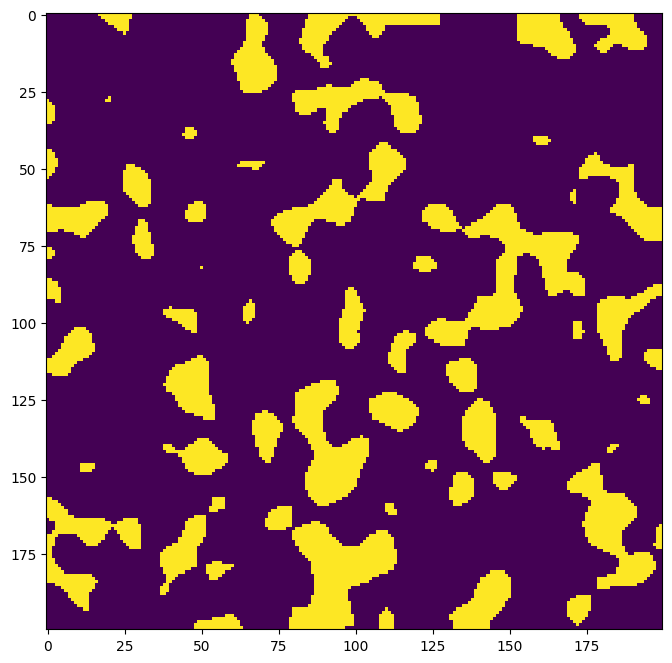

PoreSpy implementation: 2.3656702041625977 seconds
Torch implementation: 1.013291597366333 seconds
Mean Absolute Error (MAE): 5.396516816608132e-07
Mean Squared Error (MSE): 3.250911076243729e-13


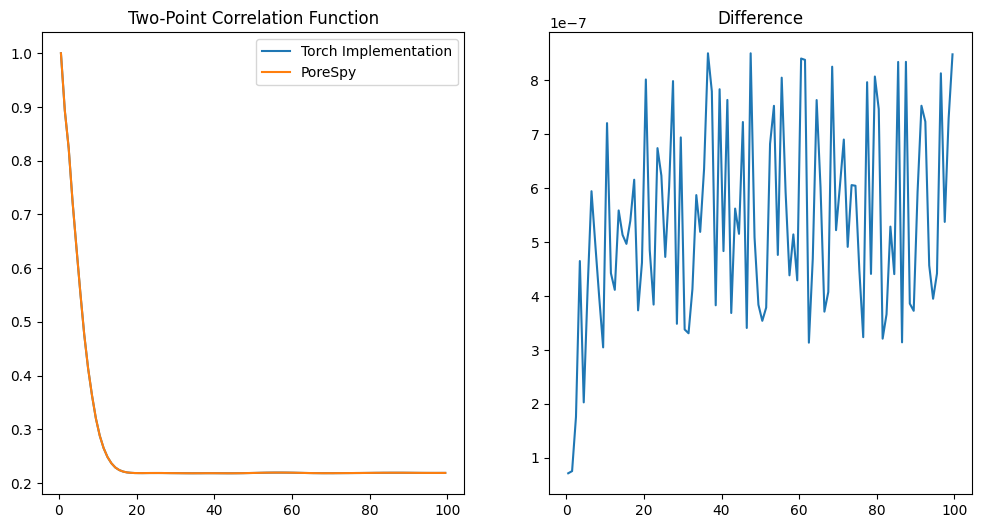

In [7]:
import numpy as np
import porespy as ps  # PoreSpy library
from torch_tpc import two_point_correlation  # Replace 'your_module' with your actual module name

# Step 1: Generate a synthetic image (or use your own data)
# Example: Generate a synthetic image using PoreSpy
shape = (200, 200, 200)
# randomize porosity and blobiness to generate different images
porosity = np.random.uniform(0.2, 0.6)
blobiness = np.random.uniform(1, 3)

im = ps.generators.blobs(shape, porosity=porosity, blobiness=blobiness)

# plot the image
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(im[:, :, 100])
plt.show()


# convert im to pytorch tensor
import torch
im = torch.from_numpy(im).float()

# compare computation time between two implementations
import time


# Step 2: Calculate two-point correlation using both implementations
bins = 100  # Adjust the number of bins as needed

start = time.time()
porespy_tpcf = ps.metrics.two_point_correlation(im, bins=bins)
end = time.time()

print(f"PoreSpy implementation: {end - start} seconds")

start = time.time()
torch_tpcf = two_point_correlation(im, bins=bins)
end = time.time()
print(f"Torch implementation: {end - start} seconds")

# Step 3: Compare the results
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(torch_tpcf.probability.numpy() - porespy_tpcf.probability))

# Calculate Mean Squared Error (MSE)
mse = np.mean((torch_tpcf.probability.numpy() - porespy_tpcf.probability) ** 2)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Optionally, you can visualize the results for further inspection
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(torch_tpcf.distance, torch_tpcf.probability, label='Torch Implementation')
plt.plot(porespy_tpcf.distance, porespy_tpcf.probability, label='PoreSpy')
plt.title('Two-Point Correlation Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(torch_tpcf.distance, torch_tpcf.probability - porespy_tpcf.probability)
plt.title('Difference')
plt.show()
